# CRIM Intervals:  Modules

### What You Can Do with this Notebook

* Find contrapuntal modules, which are ngrams representing the combination of melodic and harmonic intervals made by every pair of voices in a piece
* Count and filter these modules
* Search for them in one piece or an entire corpus.



### A. Import Intervals and Other Code


In [1]:
import intervals
from intervals import * 
from intervals import main_objs
import intervals.visualizations as viz
import pandas as pd
import re
import altair as alt
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact
from pandas.io.json import json_normalize
from pyvis.network import Network
from IPython.display import display
import requests
import os


MYDIR = ("saved_csv")
CHECK_FOLDER = os.path.isdir(MYDIR)

# If folder doesn't exist, then create it.
if not CHECK_FOLDER:
    os.makedirs(MYDIR)
    print("created folder : ", MYDIR)
else:
    print(MYDIR, "folder already exists.")
    
MUSDIR = ("Music_Files")
CHECK_FOLDER = os.path.isdir(MUSDIR)

# If folder doesn't exist, then create it.
if not CHECK_FOLDER:
    os.makedirs(MUSDIR)
    print("created folder : ", MUSDIR)
else:
    print(MUSDIR, "folder already exists.")

saved_csv folder already exists.
Music_Files folder already exists.


## B. Importing a Piece

### B.1 Import a Piece and Check Title

In [2]:
# Select a prefix:

# prefix = 'Music_Files/'
prefix = 'https://crimproject.org/mei/'

# Add your filename here
mei_file = 'CRIM_Model_0008.mei'

# and combine the strings and load the piece
url = prefix + mei_file
piece = importScore(url)

print(piece.metadata)

Successfully imported https://crimproject.org/mei/CRIM_Model_0008.mei
{'title': 'Ave Maria', 'composer': 'Josquin Des Prés'}



## C.  Contrapuntal Modules

* A **contrapuntal module** (as formulated by our colleagues Julie Cumming and Peter Schubert) is a kind **nGram** that describes the movement of any two voices:  a succession of **harmonic** intervals separated by the **melodic motion of the lower (tenor) voice**.
<br>

* In simplest form, these would be 5-Grams, as shown below, but we can search for **modules** of any length.

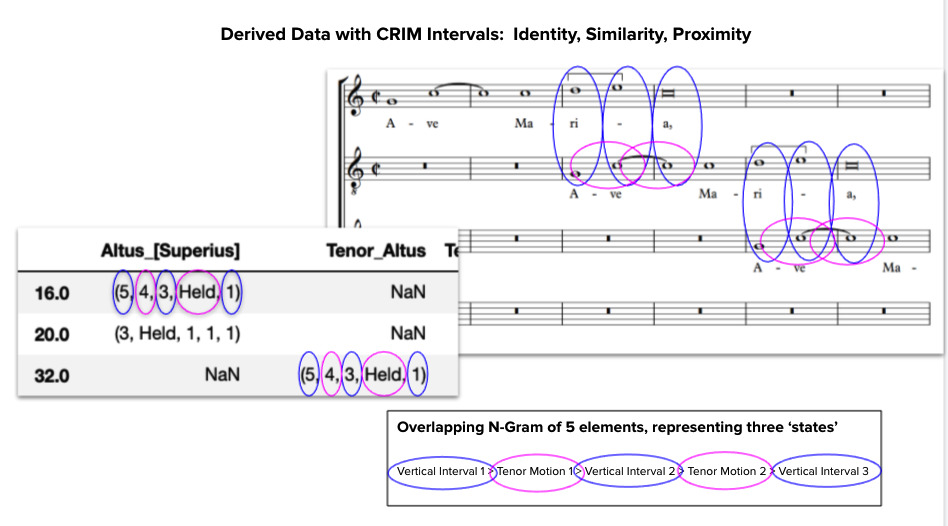

In [6]:
print(ImportedPiece.ngrams.__doc__)


        Group sequences of observations in a sliding window "n" events long
        (default n=3). If the `exclude` parameter is passed and any item in that
        list is found in an ngram, that ngram will be removed from the resulting
        DataFrame. Since `exclude` defaults to `['Rest']`, pass an empty list if
        you want to allow rests in your ngrams.

        There are two primary modes for this method. They were controlled by the
        `how` parameter, but this parameter is now deprecated and the mode is
        determined by what is or is not passed as the `df` and `other` parameters.

        When a dataframe is passed as `df` and nothing is given for `other`, this
        is the simple case where the events in each
        column of the `df` DataFrame are grouped at the offset of the first event
        in the window. For example, to get 4-grams of melodic intervals:

        ip = ImportedPiece('path_to_piece')
        ngrams = ip.ngrams(df=ip.melodic(), n=4)

    

### C.1 Find Contrapuntal Modules

* By default, `piece.ngrams()` will find ngrams of 5 units:  three harmonic events surrounding two melodic ones in the lower voice of each pair.

* But there are many other paramaters to adjust:

    > To set **length** as 5:  `piece.ngrams(n=5)`
    
    > To adjust **interval type** (d, c, z, or q): `piece.ngrams(interval_settings='d')` 
    
    > To determine the **'endpoint' of the offset reference** (as the start or end of the ngram): `piece.ngrams(offsets=
first)` or `piece.ngrams(offsets=last)`

* Typical request:

>`piece.ngrams(interval_settings='d', offsets='first', n=5).fillna('')`

* Other advanced settings are noted in the documentation

* To save an inventory of contrapuntal modules:  

    > `piece.ngrams(interval_settings='d', offsets='first', n=5).to_csv("saved_csv/mass_19_1_modules.csv")`

In [3]:
all_mods = piece.ngrams(interval_settings='d', offsets='last', n=3).fillna('')
all_mods

Bassus_Tenor     Bassus_Altus Bassus_[Superius]     Tenor_Altus  \
24.0                                                                          
28.0                                                                          
40.0                                                         5_4, 3_Held, 1   
44.0                                                         3_Held, 1_1, 1   
56.0    12_4, 10_Held, 8                                                      
...                  ...              ...               ...             ...   
1248.0      1_-4, 3_2, 3     5_-4, 8_2, 5   10_-4, 12_2, 10    5_-2, 6_2, 3   
1252.0                     8_2, 5_Held, 6                    6_2, 3_Held, 4   
1256.0      3_2, 3_-2, 5  5_Held, 6_-2, 8   12_2, 10_-2, 10  3_Held, 4_2, 4   
1272.0     3_-2, 5_-5, 8   6_-2, 8_-5, 12  10_-2, 10_-5, 15    4_2, 4_-2, 5   
1288.0      5_-5, 8_1, 8   8_-5, 12_1, 12   10_-5, 15_1, 15    4_-2, 5_1, 5   

       Tenor_[Superius]  Altus_[Superius]  
24.0                     12_4, 10_Held, 8  
28.0                      10_Held, 8_1, 8  
40.0                                       
44.0                                       
56.0                                       
...                 ...               ...  
1248.0   10_-2, 10_2, 8      6_1, 5_-3, 6  
1252.0                       5_-3, 6_2, 5  
1256.0     10_2, 8_2, 6       6_2, 5_2, 3  
1272.0     8_2, 6_-2, 8       5_2, 3_1, 4  
1288.0     6_-2, 8_1, 8       3_1, 4_1, 4  

[482 rows x 6 columns]

In [5]:
piece.ngrams(interval_settings='d', offsets='first', n=3).fillna('')

Bassus_Tenor     Bassus_Altus Bassus_[Superius]     Tenor_Altus  \
16.0                                                                          
20.0                                                                          
32.0                                                         5_4, 3_Held, 1   
36.0                                                         3_Held, 1_1, 1   
48.0    12_4, 10_Held, 8                                                      
...                  ...              ...               ...             ...   
1240.0      1_-4, 3_2, 3     5_-4, 8_2, 5   10_-4, 12_2, 10    5_-2, 6_2, 3   
1244.0      3_2, 3_-2, 5   8_2, 5_Held, 6   12_2, 10_-2, 10  6_2, 3_Held, 4   
1248.0     3_-2, 5_-5, 8  5_Held, 6_-2, 8  10_-2, 10_-5, 15  3_Held, 4_2, 4   
1252.0                     6_-2, 8_-5, 12                      4_2, 4_-2, 5   
1256.0      5_-5, 8_1, 8   8_-5, 12_1, 12   10_-5, 15_1, 15    4_-2, 5_1, 5   

       Tenor_[Superius]  Altus_[Superius]  
16.0                     12_4, 10_Held, 8  
20.0                      10_Held, 8_1, 8  
32.0                                       
36.0                                       
48.0                                       
...                 ...               ...  
1240.0   10_-2, 10_2, 8      6_1, 5_-3, 6  
1244.0     10_2, 8_2, 6      5_-3, 6_2, 5  
1248.0     8_2, 6_-2, 8       6_2, 5_2, 3  
1252.0                        5_2, 3_1, 4  
1256.0     6_-2, 8_1, 8       3_1, 4_1, 4  

[485 rows x 6 columns]

In [6]:
all_mods = piece.ngrams(interval_settings='d', offsets='last', n=3).fillna('')
offsets = [1, 2, 3, 10, 15, 27]
filtered_modules = all_mods.iloc[offsets,]
piece.detailIndex(df=filtered_modules, offset=True, beat=True)


Bassus_Tenor Bassus_Altus   Bassus_[Superius]  \
Measure Beat Offset                                                       
4       3.0  28.0                                                         
6       1.0  40.0                                                         
        3.0  44.0                                                         
10      2.0  74.0                                    10_-3, 13_Held, 12   
11      2.5  83.0                                                         
14      3.0  108.0   6_Held, 5_Held, 8                                    

                        Tenor_Altus Tenor_[Superius]    Altus_[Superius]  
Measure Beat Offset                                                       
4       3.0  28.0                                        10_Held, 8_1, 8  
6       1.0  40.0    5_4, 3_Held, 1                                       
        3.0  44.0    3_Held, 1_1, 1                                       
10      2.0  74.0                                                         
11      2.5  83.0                                     10_Held, 9_Held, 8  
14      3.0  108.0     3_-2, 4_4, 1

Bassus_Tenor     Bassus_Altus   Bassus_[Superius]  \
Measure Beat Offset                                                           
24      3.0  188.0   11_Held, 10_2, 10      8_2, 5_2, 3                       
30      1.0  232.0     10_-2, 12_2, 10  13_-2, 15_2, 12   18_Held, 17_2, 17   
35      1.0  272.0                                                            
39      1.0  304.0     7_Held, 6_-2, 8  4_Held, 3_-2, 5                       
53      1.0  416.0        8_2, 5_-5, 8     3_2, 1_-5, 5  11_Held, 10_-5, 15   
60      1.0  472.0                                                            
65      1.0  512.0     7_Held, 6_-2, 8                                        
77      1.0  608.0        7_2, 5_-5, 8                   11_Held, 10_-5, 15   
81      1.0  640.0                                                            
84      1.0  664.0        2_-2, 3_2, 1                                        
87      1.0  688.0                                                            
93      1.0  736.0     7_Held, 6_-2, 8                                        
109     1.0  928.0        8_2, 5_-5, 8    3_2, 1_-5, 12  11_Held, 10_-5, 15   
119     1.0  1008.0       2_-2, 3_2, 1                                        
127     1.0  1072.0       2_-2, 3_2, 1                                        
130     1.0  1096.0                                      11_Held, 10_-2, 12   
141     1.0  1184.0       7_2, 6_-2, 8  4_Held, 3_-2, 5                       

                           Tenor_Altus   Tenor_[Superius]   Altus_[Superius]  
Measure Beat Offset                                                           
24      3.0  188.0     -7_-2, -6_2, -8                                        
30      1.0  232.0        4_2, 4_-2, 3    7_Held, 6_-2, 8    4_Held, 3_-3, 6  
35      1.0  272.0                                           7_Held, 6_-2, 8  
39      1.0  304.0     -4_-2, -4_2, -4                                        
53      1.0  416.0    -6_-3, -5_-2, -4    7_Held, 6_-2, 8  11_Held, 10_1, 11  
60      1.0  472.0                       11_Held, 10_4, 8    7_Held, 6_-2, 8  
65      1.0  512.0                         9_-2, 10_2, 10                     
77      1.0  608.0                        7_Held, 6_-2, 8                     
81      1.0  640.0                                              2_-2, 3_2, 1  
84      1.0  664.0                                                            
87      1.0  688.0                                              2_-2, 3_2, 1  
93      1.0  736.0                                                            
109     1.0  928.0     -6_-3, -5_-2, 5    7_Held, 6_-2, 8   11_Held, 10_8, 4  
119     1.0  1008.0                                                           
127     1.0  1072.0                                                           
130     1.0  1096.0                     11_Held, 10_2, 10                     
141     1.0  1184.0  -3_Held, -4_2, -4

### NGrams with Various Options

- Diatonic, Chromatic, With-Quality, etc
- No Unisons
- Various lengths
- Exclude rests

In [12]:
mel = piece.melodic(kind="c")
har = piece.harmonic(kind="c")
ngrams = piece.ngrams(df=har, other=mel, n=3).fillna('')
ngrams.head()

Bassus_Tenor Bassus_Altus Bassus_[Superius]     Tenor_Altus  \
16.0                                                                     
20.0                                                                     
32.0                                                    7_5, 4_Held, 0   
36.0                                                    4_Held, 0_0, 0   
48.0  19_5, 16_Held, 12                                                  

     Tenor_[Superius]   Altus_[Superius]  
16.0                   19_5, 16_Held, 12  
20.0                   16_Held, 12_0, 12  
32.0                                      
36.0                                      
48.0

In [13]:
nr_no_unisons = piece.notes(combineUnisons=True)
mel = piece.melodic(df=nr_no_unisons, kind="d")
har = piece.harmonic(kind="d", compound=False)
ngrams = piece.ngrams(df=har, other=mel).fillna('')
ngrams.head()

Bassus_Tenor Bassus_Altus Bassus_[Superius]        Tenor_Altus  \
16.0                                                                     
20.0                                                                     
32.0                                                    5_4, 3_Held, 1   
36.0                                                 3_Held, 1_Held, 1   
48.0  5_4, 3_Held, 8                                                     

     Tenor_[Superius]   Altus_[Superius]  
16.0                      5_4, 3_Held, 8  
20.0                   3_Held, 8_Held, 8  
32.0                                      
36.0                                      
48.0

### C.2 Count Contrapuntal Modules

* how many of each `nGram` in this piece?
* variables for `kind`, `compound` `length`
* it is also possible exclude nGrams with **rests**, as shown here.

In [9]:

piece.ngrams(exclude=['Rest']).stack().value_counts().to_frame()

0
6_2, 5_Held, 6     19
5_Held, 6_2, 5     16
5_-2, 6_-2, 8      13
3_-2, 4_-2, 5      11
3_Held, 2_Held, 1  11
...                ..
9_Held, 8_-3, 10    1
15_-2, 17_2, 16     1
15_-3, 17_2, 15     1
9_-2, 10_Held, 8    1
1_1, 1_-3, 3        1

[696 rows x 1 columns]

### C.3  Search for Modules

It's possible to search for any module, but cadences are quite formulaic, and thus are especially discoverable with this method.  Here are a few of the typical combinations expressed as modules.  Copy and paste some of these into the interactive search below to see where they occur in your piece.

* Authentic/Phrygian cadence with suspension in **diatonic**: `7_Held, 6_-2, 8` or `2_-3, 3_2, 1`

* Authentic cadence with suspension in **chromatic**: `10_Held, 9_-2, 12`

* Authentic cadence with suspension in **with quality**:`m7_Held, M6_-2, P8`

* Phrygian cadence with suspension in **chromatic**: `11_Held, 9_-2, 12`

* Phrygian cadence with suspension in **with quality**: `M7_Held, M6_-2, P8`

* Plagal cadence (no suspension) is often **diatonic**:  `6_-2, 6_-2, 6` at same time we hear `5_2,-4, 5`

In [10]:
@interact
def get_modules(search_pattern="", kind=["d", "q", "c", "z"], compound=[True, False], length=[3, 4, 5, 6], endpoint=["last", "first"]):
    
    piece_mel = piece.melodic(kind=kind)
    piece_har = piece.harmonic(kind=kind, compound=compound)
    ngrams = piece.ngrams(df=piece_har, other=piece_mel, n=length, offsets=endpoint)
    filtered_ngrams = ngrams[ngrams.apply(lambda x: x.astype(str).str.contains(search_pattern).any(), axis=1)]#.copy()
    beats_measures_mod = piece.detailIndex(filtered_ngrams, offset=True)

    return beats_measures_mod.fillna("-").applymap(str).style.applymap(lambda x: "background: #ccebc5" if re.search(search_pattern, x) else "")



interactive(children=(Text(value='', description='search_pattern'), Dropdown(description='kind', options=('d',…

## D. Corpus Inventory

* The **CorpusBase** class is a convenient way to find patterns in any given list of pieces.
* See the Corpus Methods notebook for a full explanation of ways to import local and remote files

Example:

* The pieces are provided as a **list**, within **square brackets** and **separated by commas**.  
* The bracketed list is then contained within the parentheses of `CorpusBase()`
* For example: 

    > `corpus CorpusBase(['https://crimproject.org/mei/CRIM_Mass_0006_1.mei', 'https://crimproject.org/mei/CRIM_Mass_0006_2.mei', 'https://crimproject.org/mei/CRIM_Mass_0006_3.mei'])`
           
* Read the documentation:  `print(CorpusBase.batch.__doc__)`



In [11]:
corpus = CorpusBase(['https://crimproject.org/mei/CRIM_Model_0008.mei',
                     'https://crimproject.org/mei/CRIM_Mass_0005_2.mei'])

Previously imported piece detected.
Successfully imported https://crimproject.org/mei/CRIM_Mass_0005_2.mei


In [2]:
import glob
corpus_list = []
for name in glob.glob('Music_Files/*'):
    corpus_list.append(name)
corpus = CorpusBase(corpus_list)

Successfully imported Music_Files/Morley_1597_068.xml
Successfully imported Music_Files/Morley_1597_135_2.xml
Successfully imported Music_Files/Morley_1597_132_08.xml
Successfully imported Music_Files/Morley_1597_131_6.xml
Successfully imported Music_Files/Morley_1597_076_1.xml
Successfully imported Music_Files/Morley_1597_131_7.xml
Successfully imported Music_Files/Morley_1597_132_09.xml
Successfully imported Music_Files/Morley_1597_135_3.xml
Successfully imported Music_Files/Morley_1597_072_4.xml
Successfully imported Music_Files/Morley_1597_214-215.xml
Successfully imported Music_Files/Morley_1597_135_1.xml
Successfully imported Music_Files/Morley_1597_072_6.xml
Successfully imported Music_Files/Morley_1597_076_2.xml
Successfully imported Music_Files/Morley_1597_131_5.xml
Successfully imported Music_Files/Morley_1597_131_4.xml
Successfully imported Music_Files/Morley_1597_076_3.xml
Successfully imported Music_Files/Morley_1597_135_4.xml
Successfully imported Music_Files/Morley_1597_

### D.1  Corpus Ngram Inventory

*  Get the `ngrams` for all of them.  
*  In this case:  modules of length "3", with diatonic simple intervals
*  Then combine them into one frame



* NB: use `ImportedPiece`, not `piece`!
* NB:  for `func` do **NOT** include the closing parentheses!

    - `func = ImportedPiece.ngrams`
    - `list_of_modules = corpus.batch(func=func, kwargs={'n': 3, 'interval_settings': ('d', False, True)}, metadata=True)`

    - `title_of_output = pd.concat(list_of_melodic_ngrams)`

* Note that the output lists voice pairs by **staff position**.  In a four-voice piece, the lowest part would be 4, then 3, etc.  `4_3` represents the two lowest voices of the piece, and so on.


In [12]:
# remember to omit "()" after calling `ngrams`
# here we are using simple diatonic
func = ImportedPiece.ngrams
list_of_modules = corpus.batch(func=func, kwargs={'n': 3, 'interval_settings': ('d', True, True), 'offsets': 'last'}, metadata=True)
func2 = ImportedPiece.detailIndex
list_of_details = corpus.batch(func=func2, kwargs={'offset': True, 'df': list_of_modules})

module_corpus = pd.concat(list_of_details).fillna('-').dropna(how="all")

c = module_corpus['Composer']
t = module_corpus["Title"]
module_corpus.pop("Composer")
module_corpus.pop("Title")
module_corpus.insert(0, "Composer", c)
module_corpus.insert(1, "Title", t)
module_corpus

Composer                    Title  \
Measure Beat Offset                                              
4       1.0  24.0    Josquin Des Prés                Ave Maria   
        3.0  28.0    Josquin Des Prés                Ave Maria   
6       1.0  40.0    Josquin Des Prés                Ave Maria   
        3.0  44.0    Josquin Des Prés                Ave Maria   
8       1.0  56.0    Josquin Des Prés                Ave Maria   
...                               ...                      ...   
161     4.0  1342.0  Antoine de Févin  Missa Ave Maria: Gloria   
162     1.0  1344.0  Antoine de Févin  Missa Ave Maria: Gloria   
        4.0  1350.0  Antoine de Févin  Missa Ave Maria: Gloria   
        4.5  1351.0  Antoine de Févin  Missa Ave Maria: Gloria   
163     1.0  1352.0  Antoine de Févin  Missa Ave Maria: Gloria   

                                  4_3                 4_2                 4_1  \
Measure Beat Offset                                                             
4       1.0  24.0                   -                   -                   -   
        3.0  28.0                   -                   -                   -   
6       1.0  40.0                   -                   -                   -   
        3.0  44.0                   -                   -                   -   
8       1.0  56.0    12_4, 10_Held, 8                   -                   -   
...                               ...                 ...                 ...   
161     4.0  1342.0                 -                   -  10_-2, 11_Held, 10   
162     1.0  1344.0     3_-2, 5_-5, 8      3_-2, 8_-5, 10  11_Held, 10_-5, 15   
        4.0  1350.0                 -    8_-5, 10_Held, 9                   -   
        4.5  1351.0                 -  10_Held, 9_Held, 8                   -   
163     1.0  1352.0                 -  9_Held, 8_Held, 12                   -   

                                   3_2              3_1               2_1  
Measure Beat Offset                                                        
4       1.0  24.0                    -                -  12_4, 10_Held, 8  
        3.0  28.0                    -                -   10_Held, 8_1, 8  
6       1.0  40.0       5_4, 3_Held, 1                -                 -  
        3.0  44.0       3_Held, 1_1, 1                -                 -  
8       1.0  56.0                    -                -                 -  
...                                ...              ...               ...  
161     4.0  1342.0                  -   8_2, 7_Held, 6    8_5, 4_Held, 3  
162     1.0  1344.0       1_2, 4_-2, 3  7_Held, 6_-2, 8   4_Held, 3_-3, 6  
        4.0  1350.0    4_-2, 3_Held, 2                -     3_-3, 6_-2, 7  
        4.5  1351.0  3_Held, 2_Held, 1                -     6_-2, 7_-2, 8  
163     1.0  1352.0  2_Held, 1_Held, 5                -      7_-2, 8_5, 4  

[1097 rows x 8 columns]

In [8]:
Morley_1597_194 = module_corpus[module_corpus['Title'].isin(['Morley_1597_194'])]
Morley_1597_194.to_csv('Morley_1597_194.csv')

### D.2  Search Ngrams in the Corpus

* Note that the interval and pattern settings (diatonic/chromatic; compound/simple; length of ngrams) for this tool are set in the request for **module_corpus** above.

In [10]:
from IPython.core.display import display, HTML
display(HTML("<style>div.output_scroll { height: 44em; }</style>"))

/var/folders/_s/4t2p1z2x0yxcv068dtqj31tw0000gq/T/ipykernel_22418/2284580335.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [13]:
# HERE we have repeating modules from the Josquin opening PEN
@interact
def new_ngram_search(my_search="", df = fixed(module_corpus)):
    df2 = module_corpus.copy()
    c = df['Composer']
    t = df["Title"]
    df2.pop("Composer")
    df2.pop("Title")
    df2.insert(0, "Composer", c)
    df2.insert(1, "Title", t)
    filtered_ngrams = df2[df2.apply(lambda x: x.astype(str).str.contains(my_search).any(), axis=1)].copy()
    
    pd.set_option('max_columns', None)
    return filtered_ngrams.fillna("-").reset_index().applymap(str).style.applymap(lambda x: "background: #ccebc4" if re.search(my_search, x) else "")

interactive(children=(Text(value='', description='my_search'), Output()), _dom_classes=('widget-interact',))

In [8]:
# Here we have the other repeating module from Josquin opening!

@interact
def new_ngram_search(my_search="", df = fixed(module_corpus)):
    df2 = module_corpus.copy()
    c = df['Composer']
    t = df["Title"]
    df2.pop("Composer")
    df2.pop("Title")
    df2.insert(0, "Composer", c)
    df2.insert(1, "Title", t)
    filtered_ngrams = df2[df2.apply(lambda x: x.astype(str).str.contains(my_search).any(), axis=1)].copy()
    
    pd.set_option('max_columns', None)
    return filtered_ngrams.fillna("-").reset_index().applymap(str).style.applymap(lambda x: "background: #ccebc4" if re.search(my_search, x) else "")

interactive(children=(Text(value='', description='my_search'), Output()), _dom_classes=('widget-interact',))